In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Conseguimos las gráficas de líneas de cada una de las acciones y del índice   

archivos = {
    "Apple": "../data/historico_Apple.xlsx",
    "Microsoft": "../data/historico_Microsoft.xlsx",
    "Nvidia": "../data/historico_Nvidia.xlsx",
    "Amazon": "../data/historico_Amazon.xlsx",
    "Meta": "../data/historico_Meta.xlsx",
    "S&P 500": "../data/historico_SP500.xlsx"
}

historico_todas = pd.DataFrame()

for nombre, ruta in archivos.items():
    df = pd.read_excel(ruta)
    df["Date"] = pd.to_datetime(df["Date"])

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x="Date", y="Close")
    plt.title(f"Evolución del precio de cierre - {nombre}")
    plt.xlabel("Fecha")
    plt.ylabel("Precio de cierre")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#Comparacion histórico entre accion/indice

archivos = {
    "Apple": "../data/historico_Apple.xlsx",
    "Microsoft": "../data/historico_Microsoft.xlsx",
    "Nvidia": "../data/historico_Nvidia.xlsx",
    "Amazon": "../data/historico_Amazon.xlsx",
    "Meta": "../data/historico_Meta.xlsx",
    "S&P 500": "../data/historico_SP500.xlsx"
}

df_sp500 = pd.read_excel("../data/historico_SP500.xlsx")
df_sp500["Fecha"] = pd.to_datetime(df_sp500["Date"])
df_sp500["Close_norm"] = df_sp500["Close"] / df_sp500["Close"].iloc[0] * 100 #Necesitamos normalizar los datos para que gráficamente se puedan ver bien

#Si se ejecuta sin normalizar, visualmente no se pueden sacar los datos

# Recorrer cada acción
for nombre, ruta in archivos.items():
    df_accion = pd.read_excel(ruta)
    df_accion["Fecha"] = pd.to_datetime(df_accion["Date"])
    df_accion["Close_norm"] = df_accion["Close"] / df_accion["Close"].iloc[0] * 100

    # Crear la gráfica
    plt.figure(figsize=(10, 5))
    plt.plot(df_accion["Fecha"], df_accion["Close_norm"], label=nombre)
    plt.plot(df_sp500["Fecha"], df_sp500["Close_norm"], label="S&P 500", linestyle="--")
    plt.title(f"{nombre} vs S&P 500 (Precios Normalizados)")
    plt.xlabel("Fecha")
    plt.ylabel("Precio Normalizado")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
#Gráfico de barras de la tabla comparativa de las acciones por rentabilidad

df = pd.read_excel("../data/tabla_comparativa.xlsx")

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Acción", y = "Rentabilidad Comparada con el índice")
for index, row in df.iterrows():
    plt.text(index, row["Rentabilidad Comparada con el índice"] + 0.5,
             f"{round(row['Rentabilidad Comparada con el índice'], 2)}%",
             ha='center', va='bottom', fontsize=10)
plt.title("Análisis de rentabilidad de las acciones frente al S&P 500")
plt.xlabel("Acción")
plt.ylabel("Diferencia de Rentabilidad (%)")
plt.show()

In [ ]:
#Gráfico de barras de la tabla comparativa de las acciones por Ratio de Sharpe

df = pd.read_excel("../data/tabla_comparativa.xlsx")

plt.figure(figsize=(12,6))
sns.barplot(data=df, x="Acción", y = "Ratio de Sharpe")
for index, row in df.iterrows():
    plt.text(index, row["Ratio de Sharpe"],
             f"{round(row['Ratio de Sharpe'], 2)}%",
             ha='center', va='bottom', fontsize=10)
plt.title("Ratio de Sharpe entre acciones")
plt.xlabel("Acción")
plt.ylabel("Relación Rentabilidad / Riesgo")
plt.show()

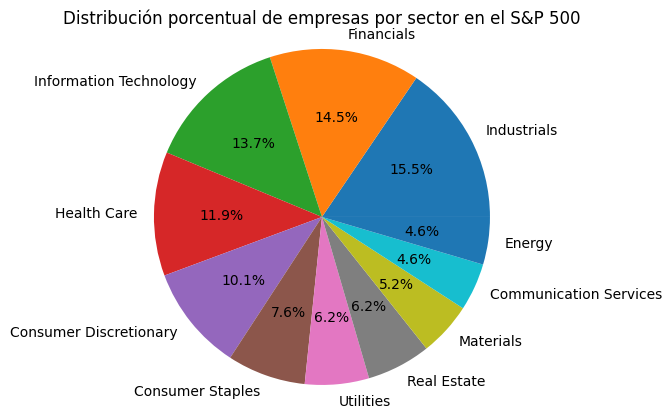

In [5]:
#Generar el gráfico de sectores
df = pd.read_csv("../data/sp500_companies_names.csv")
sector_counts = df["GICS Sector"].value_counts(normalize=True) * 100
plt.pie(sector_counts, labels=sector_counts.index, autopct="%1.1f%%")
plt.title("Distribución porcentual de empresas por sector en el S&P 500")
plt.axis('equal')
plt.show()